In [198]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data=pd.read_csv(mouse_drug_data_to_load)
clinical_data=pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_data=pd.merge(clinical_data,mouse_data, on="Mouse ID")


# Display the data table for preview
combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [199]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped_drugs=combined_data.groupby(["Drug","Timepoint"]).mean()
# Convert to DataFrame
grouped_drugs=grouped_drugs.drop(columns=["Metastatic Sites"])
grouped_drugs=grouped_drugs.reset_index()
# Preview DataFrame
grouped_drugs.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [200]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

drug_error=combined_data.groupby(["Drug","Timepoint"]).sem()
drug_error=drug_error["Tumor Volume (mm3)"]
drug_error=drug_error.reset_index()

# Convert to DataFrame

# Preview DataFrame
drug_error.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [201]:
# Minor Data Munging to Re-Format the Data Frames

pivoted_drugs=grouped_drugs.pivot(index="Timepoint",columns="Drug")
pivoted_errors=drug_error.pivot(index="Timepoint",columns="Drug")

# Preview that Reformatting worked
pivoted_drugs.head()


Tumor Volume (mm3)                                              \
Drug               Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol   
Timepoint                                                                  
0                  45.000000  45.000000  45.000000  45.000000  45.000000   
5                  44.266086  46.503051  47.062001  47.389175  46.796098   
10                 43.084291  48.285125  49.403909  49.582269  48.694210   
15                 42.064317  50.094055  51.296397  52.399974  50.933018   
20                 40.716325  52.157049  53.197691  54.920935  53.644087   

                                                                  
Drug         Placebo   Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                                         
0          45.000000  45.000000  45.000000  45.000000  45.000000  
5          47.125589  47.248967  43.944859  47.527452  46.851818  
10         49.423329  49.101541  42.531957  49.463844  48.689881  
15         51.359742  51.067318  41.495061  51.529409  50.779059  
20         54.364417  53.346737  40.238325  54.067395  53.170334

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


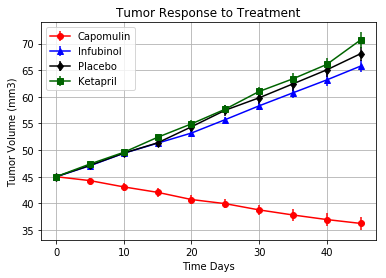

In [202]:
# Generate the Plot (with Error Bars)

#Will make loop if I have time
#Drugs=["Capomulin","Infubinol","Placebo","Ketapril"]

#for drug in Drugs:
plt.errorbar(pivoted_drugs.index.values,pivoted_drugs['Tumor Volume (mm3)']["Capomulin"],yerr=pivoted_errors["Tumor Volume (mm3)"]["Capomulin"] , marker="o",color="red")
plt.errorbar(pivoted_drugs.index.values,pivoted_drugs['Tumor Volume (mm3)']["Infubinol"],yerr=pivoted_errors["Tumor Volume (mm3)"]["Infubinol"],marker="^",color="blue")
plt.errorbar(pivoted_drugs.index.values,pivoted_drugs['Tumor Volume (mm3)']["Placebo"],yerr=pivoted_errors["Tumor Volume (mm3)"]["Placebo"],marker="d",color="black")
plt.errorbar(pivoted_drugs.index.values,pivoted_drugs['Tumor Volume (mm3)']["Ketapril"],yerr=pivoted_errors["Tumor Volume (mm3)"]["Ketapril"],marker="s",color="darkgreen")

plt.xlabel("Time Days")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")
plt.grid(b=True)
# Create a legend
plt.legend()

# Save the Figure
plt.savefig("PyPharm01.png")

#pivoted_drugs['Tumor Volume (mm3)']["Capomulin"]
plt.show()

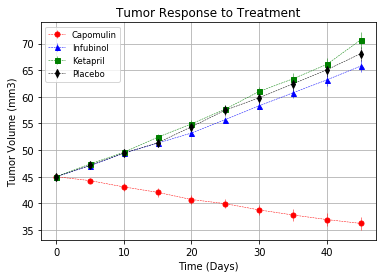

In [5]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [203]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_site=combined_data.groupby(["Drug","Timepoint"]).mean()
# Convert to DataFrame
mean_met_site=mean_met_site.drop(columns=["Tumor Volume (mm3)"])
mean_met_site=mean_met_site.reset_index()
# Preview DataFrame
mean_met_site.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [204]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sites_error=combined_data.groupby(["Drug","Timepoint"]).sem()
sites_error=sites_error["Metastatic Sites"]
sites_error=sites_error.reset_index()

# Convert to DataFrame

# Preview DataFrame
sites_error.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [205]:
# Minor Data Munging to Re-Format the Data Frames
pivoted_sites=mean_met_site.pivot(index="Timepoint",columns="Drug")
pivoted_site_errors=sites_error.pivot(index="Timepoint",columns="Drug")

# Preview that Reformatting worked
pivoted_sites.head()


Metastatic Sites                                                    \
Drug             Capomulin  Ceftamin Infubinol  Ketapril  Naftisol   Placebo   
Timepoint                                                                      
0                 0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5                 0.160000  0.380952  0.280000  0.304348  0.260870  0.375000   
10                0.320000  0.600000  0.666667  0.590909  0.523810  0.833333   
15                0.375000  0.789474  0.904762  0.842105  0.857143  1.250000   
20                0.652174  1.111111  1.050000  1.210526  1.150000  1.526316   

                                                   
Drug       Propriva  Ramicane  Stelasyn Zoniferol  
Timepoint                                          
0          0.000000  0.000000  0.000000  0.000000  
5          0.320000  0.120000  0.240000  0.166667  
10         0.565217  0.250000  0.478261  0.500000  
15         0.764706  0.333333  0.782609  0.809524  
20         1.000000  0.347826  0.952381  1.294118

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


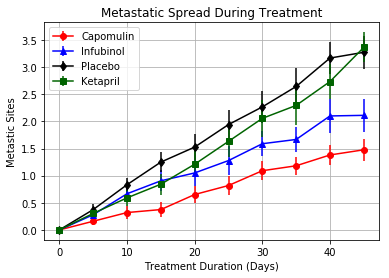

In [206]:
# Generate the Plot (with Error Bars)
plt.errorbar(pivoted_sites.index.values,pivoted_sites['Metastatic Sites']["Capomulin"],yerr=pivoted_site_errors["Metastatic Sites"]["Capomulin"] , marker="o",color="red")
plt.errorbar(pivoted_sites.index.values,pivoted_sites['Metastatic Sites']["Infubinol"],yerr=pivoted_site_errors["Metastatic Sites"]["Infubinol"],marker="^",color="blue")
plt.errorbar(pivoted_sites.index.values,pivoted_sites['Metastatic Sites']["Placebo"],yerr=pivoted_site_errors["Metastatic Sites"]["Placebo"],marker="d",color="black")
plt.errorbar(pivoted_sites.index.values,pivoted_sites['Metastatic Sites']["Ketapril"],yerr=pivoted_site_errors["Metastatic Sites"]["Ketapril"],marker="s",color="darkgreen")

plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metastic Sites")
plt.title("Metastatic Spread During Treatment")
plt.grid(b=True)
# Create a legend
plt.legend()
# Save the Figure
plt.savefig("PyPharm02.png")
# Show the Figure
plt.show()

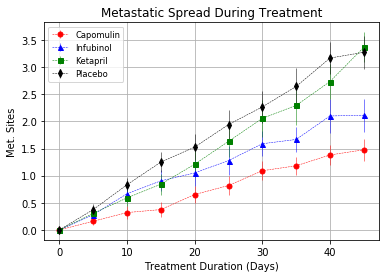

## Survival Rates

In [207]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
deadmice=combined_data.groupby(["Drug","Timepoint"]).count()
# Convert to DataFrame
deadmice["Mouse Count"]=deadmice["Mouse ID"]
deadmice=deadmice["Mouse Count"]
deadmice=deadmice.reset_index()
# Preview DataFrame
deadmice.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [208]:
# Minor Data Munging to Re-Format the Data Frames
pivoted_mice=deadmice.pivot(index="Timepoint" ,columns="Drug")
# Preview the Data Frame
pivoted_mice.head()

Mouse Count                                                        \
Drug        Capomulin Ceftamin Infubinol Ketapril Naftisol Placebo Propriva   
Timepoint                                                                     
0                  25       25        25       25       25      25       26   
5                  25       21        25       23       23      24       25   
10                 25       20        21       22       21      24       23   
15                 24       19        21       19       21      20       17   
20                 23       18        20       19       20      19       17   

                                       
Drug      Ramicane Stelasyn Zoniferol  
Timepoint                              
0               25       26        25  
5               25       25        24  
10              24       23        22  
15              24       23        21  
20              23       21        17

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


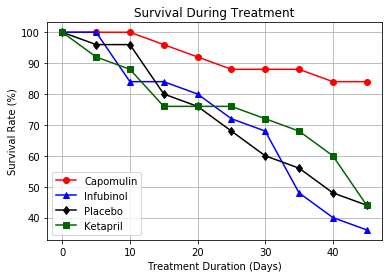

In [209]:
# Generate the Plot (Accounting for percentages)
plt.plot(pivoted_mice.index.values,pivoted_mice['Mouse Count']["Capomulin"]/25*100,marker="o",color="red")
plt.plot(pivoted_mice.index.values,pivoted_mice['Mouse Count']["Infubinol"]/25*100,marker="^",color="blue")
plt.plot(pivoted_mice.index.values,pivoted_mice['Mouse Count']["Placebo"]/25*100,marker="d",color="black")
plt.plot(pivoted_mice.index.values,pivoted_mice['Mouse Count']["Ketapril"]/25*100,marker="s",color="darkgreen")

plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Survival Rate (%)")
plt.title("Survival During Treatment")
plt.grid(b=True)
# Create a legend
plt.legend()
# Save the Figure
plt.savefig("PyPharm03.png")
# Show the Figure
plt.show()

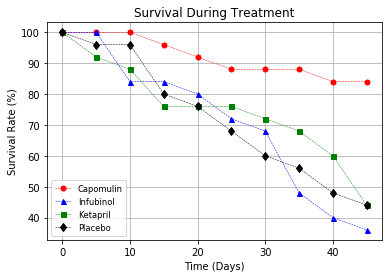

## Summary Bar Graph

In [210]:
# Calculate the percent changes for each drug
# I verified in the data that the initial tumor volume for all mice and all drugs is 45
initial_tumor_size=45
#we only are interested in 4 drugs
drug_list=["Capomulin", "Infubinol" , "Ketapril" , "Placebo" ]
#Averge all the things
average_data=combined_data.groupby(["Drug","Timepoint"]).mean()
percentage_values=[]
#The 45 in the loc here represents finding the tumor size on day 45.
for drug in drug_list:
    percentage_values.append((float(average_data["Tumor Volume (mm3)"].loc[[(drug, 45)]])-initial_tumor_size)/initial_tumor_size *100 )


    
percentage_values

# Display the data to confirm
bar_graph=pd.DataFrame(list(zip(drug_list,percentage_values)), columns=["Drugs","Percent Change"])
bar_graph

,Drugs,Percent Change
0,Capomulin,-19.475303
1,Infubinol,46.123472
2,Ketapril,57.028795
3,Placebo,51.297960


Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

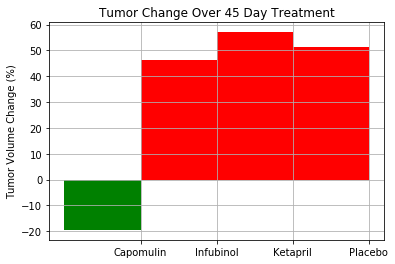

In [211]:
# Store all Relevant Percent Changes into a Tuple

bar_height=bar_graph["Percent Change"]
bars=bar_graph["Drugs"]
y_pos = np.arange(len(bar_graph["Drugs"]))


# Splice the data between passing and failing drugs

# I decided to add a new column to the DF called color and do logic to add that to there
bar_graph["Color"]=""
bar_graph["Color"].loc[bar_graph["Percent Change"] <0] = "Green"
bar_graph["Color"].loc[bar_graph["Percent Change"] >=0] = "Red"

colors=bar_graph["Color"]


ax=plt.bar(bars,bar_height,color=colors,align="edge", width=-1)

# Orient widths. Add labels, tick marks, etc. 
plt.xticks(y_pos, bars)
plt.ylabel("Tumor Volume Change (%)")
plt.title("Tumor Change Over 45 Day Treatment")
plt.grid(b=True )

# Use functions to label the percentages of changes

# I don't understand how to do this. I've spent too much time trying to figure this out.

# Call functions to implement the function calls


# Save the Figure
plt.savefig("PyPharm04.png")

# Show the Figure
plt.show()

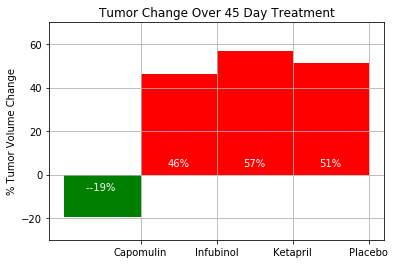